# Lending Club Case Study

EDA with the help of a case study.

**Problem Statement**

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
  
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

Use EDA to understand how consumer attributes and loan attributes influence the tendency of default.




### Session 1 - Introduction to Data Visualisation

In [5]:
#import the libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loan data set is huge. So adjust Pandas display options to show all columns
pd.set_option('display.max_columns', None)

In [7]:
#read the dataset and check the first five rows
loan = pd.read_csv("loan.csv")
loan.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_18056\3612398274.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [8]:
# Print all column names
print(loan.columns)

#To display all the column names without the ellipsis convert to list.
print(loan.columns.tolist())

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_pr

In [9]:
#Check the shape of the dataframe
loan.shape

(39717, 111)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [12]:
#Check the datatypes of all the columns of the dataframe
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [13]:
loan = loan.dropna(how='all')  # Drop rows where all values are NaN

#### Missing Value Treatment

In [15]:
#Check the number of null values in the columns
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [16]:
# Remove columns with all missing values. loan.dropna() is a method that removes missing or NaN values from the DataFrame
loan = loan.dropna(axis=1, how='all')

In [17]:
#Check the shape of the dataframe after dropping columns with all missing values
loan.shape

(39717, 57)

In [18]:
#Check the number of null values in the columns
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [19]:
# Calculate the percentage of missing values for each column. 
missing_value_percentange = (loan.isnull().sum() / loan.shape[0]) * 100

# Keeping the threshold of 30% missing values, Display columns with more than 30% missing values. 
high_missing_columns = missing_value_percentange[missing_value_percentange > 30]
high_missing_columns

desc                      32.585543
mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
next_pymnt_d              97.129693
dtype: float64

In [20]:
#Drop the columns with more than 30% missing values. 
loan = loan.dropna(thresh=loan.shape[0] * 0.7, axis=1)
#Check the shape of the dataframe
loan.shape

(39717, 53)

In [21]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [22]:
# Inspect data types and check for missing values
loan_info = loan.info()
loan_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [23]:
#Dropping some Irrelevant Columns: as id, member_id, url,emp_title,title and desc
loan.drop('id', axis=1, inplace=True)
loan.drop('member_id', axis=1, inplace=True)
loan.drop('url', axis=1, inplace=True)
loan.drop('emp_title', axis=1, inplace=True)
loan.drop('title', axis=1, inplace=True)
loan.shape

(39717, 48)

In [24]:
loan.isnull().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      50
total_acc                        0
initial_list_status              0
out_prncp           

In [25]:
#Drop the rows having null values in the Emp Length field
loan1 = loan[~loan.emp_length.isnull()]

#Drop the rows having null values in the pub_rec_bankruptcies field
loan1 = loan1[~loan1.pub_rec_bankruptcies.isnull()]

#Drop the rows having null values in the last_pymnt_d field
loan1 = loan1[~loan1.last_pymnt_d.isnull()]

#Drop the rows having null values in the last_credit_pull_d field
loan1 = loan1[~loan1.last_credit_pull_d.isnull()]

#Check the shape of the dataframe
loan1.shape

(37878, 48)

In [26]:
loan1.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    43
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymn

In [27]:
#Inspect the nulls in the revol_util column
loan1[loan1['revol_util'].isnull()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
3565,8000,8000,8000.000000,36 months,19.42%,294.95,E,E3,3 years,RENT,30000.0,Source Verified,Nov-11,Fully Paid,n,debt_consolidation,600xx,IL,18.56,0,Sep-92,1,6,0,0,NaN,10,f,0.0,0.0,10706.010820,10706.01,8000.00,2691.01,15.000000,0.00,0.0000,Dec-14,76.83,Dec-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4943,7200,7200,7200.000000,36 months,14.27%,247.03,C,C2,7 years,RENT,48000.0,Not Verified,Oct-11,Fully Paid,n,debt_consolidation,961xx,CA,15.28,0,Mar-97,0,2,0,0,NaN,25,f,0.0,0.0,7306.070000,7306.07,7200.00,106.07,0.000000,0.00,0.0000,Apr-12,66.27,Mar-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
12042,3000,3000,3000.000000,60 months,22.11%,83.05,G,G1,6 years,OWN,17652.0,Source Verified,Jul-11,Charged Off,n,other,551xx,MN,0.00,0,Jan-08,0,3,0,0,NaN,5,f,0.0,0.0,498.490000,498.49,113.96,217.52,0.000000,167.01,30.0618,Nov-11,83.05,Apr-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
12147,4275,4275,4275.000000,36 months,15.99%,150.28,D,D2,7 years,MORTGAGE,54500.0,Not Verified,Jul-11,Fully Paid,n,home_improvement,273xx,NC,7.49,0,Jun-05,0,2,0,0,NaN,9,f,0.0,0.0,5356.188342,5356.19,4275.00,1081.19,0.000000,0.00,0.0000,Dec-13,1166.73,Jan-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
17985,20000,20000,4575.003440,60 months,20.48%,535.24,G,G2,10+ years,RENT,42000.0,Verified,Mar-11,Charged Off,n,debt_consolidation,430xx,OH,18.91,0,Oct-96,2,3,0,0,NaN,18,f,0.0,0.0,6375.060000,1452.03,2091.72,3252.38,0.000000,1030.96,185.5728,Feb-12,535.24,Jul-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
18184,1825,1825,1825.000000,36 months,12.68%,61.22,C,C1,< 1 year,RENT,19200.0,Not Verified,Mar-11,Fully Paid,n,major_purchase,941xx,CA,16.81,0,Nov-06,0,7,0,0,NaN,11,f,0.0,0.0,1930.955066,1930.96,1825.00,105.96,0.000000,0.00,0.0000,May-12,223.80,May-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
21604,2500,2500,2500.000000,36 months,16.69%,88.75,E,E3,7 years,RENT,27024.0,Verified,Dec-10,Fully Paid,n,debt_consolidation,952xx,CA,5.24,1,Jan-06,0,2,0,0,NaN,3,f,0.0,0.0,3197.342651,3197.34,2500.00,697.34,0.000000,0.00,0.0000,Jan-14,99.82,Feb-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
24663,1000,1000,1000.000000,36 months,14.84%,34.59,D,D1,< 1 year,RENT,18000.0,Source Verified,Oct-10,Fully Paid,n,moving,088xx,NJ,0.00,0,Sep-06,2,11,0,0,NaN,11,f,0.0,0.0,1245.249354,1245.25,1000.00,245.25,0.000000,0.00,0.0000,Nov-13,37.99,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
24738,3000,3000,3000.000000,36 months,16.32%,105.95,D,D5,4 years,RENT,30000.0,Source Verified,Oct-10,Fully Paid,n,other,082xx,NJ,3.68,0,Sep-04,1,4,0,0,NaN,5,f,0.0,0.0,3814.408677,3814.41,3000.00,814.41,0.000000,0.00,0.0000,Nov-13,111.46,Oct-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
25261,8000,8000,8000.000000,36 months,15.58%,279.61,D,D3,1 year,OWN,38400.0,Verified,Oct-10,Charged Off,n,major_purchase,180xx,PA,18.38,0,Oct-05,0,8,0,0,NaN,11,f,0.0,0.0,6353.930000,6353.93,4431.52,1705.38,0.000000,217.03,2.4300,Aug-12,279.61,Feb-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [28]:
# Remove the '%' symbol in revol_util and convert to float
loan1['revol_util'] = loan1['revol_util'].replace({'%': ''}, regex=True).astype(float)
loan1['revol_util'].dtype

dtype('float64')

In [29]:
#Fill up the nulls in the revol_util column with the median value
revol_median = loan1['revol_util'].median()
loan1['revol_util'] = loan1['revol_util'].fillna(revol_median)

In [30]:
#Inspect the nulls in the collections_12_mths_ex_med  column
loan1[loan1['collections_12_mths_ex_med'].isnull()]

# Replace missing numerical values (collections_12_mths_ex_med) with median
collections_median = loan1['collections_12_mths_ex_med'].median()
loan1['collections_12_mths_ex_med'] = loan1['collections_12_mths_ex_med'].fillna(collections_median)

# Replace missing numerical values (chargeoff_within_12_mths) with median
chargeoff_median = loan1['chargeoff_within_12_mths'].median()
loan1['chargeoff_within_12_mths'] = loan1['chargeoff_within_12_mths'].fillna(chargeoff_median)
      

loan1.info

<bound method DataFrame.info of        loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0           5000         5000           4975.0   36 months   10.65%   
1           2500         2500           2500.0   60 months   15.27%   
2           2400         2400           2400.0   36 months   15.96%   
3          10000        10000          10000.0   36 months   13.49%   
4           3000         3000           3000.0   60 months   12.69%   
...          ...          ...              ...         ...      ...   
39562       4800         4800           1100.0   36 months   10.28%   
39573       7000         7000           1000.0   36 months   10.59%   
39623       9000         9000            700.0   36 months   12.49%   
39666      15450        15450            600.0   36 months   11.22%   
39680       3000         3000            525.0   36 months   11.86%   

       installment grade sub_grade emp_length home_ownership  annual_inc  \
0           162.87     B        B2  10+

In [31]:
loan1.shape

(37878, 48)

In [32]:
# Verify data types and handle any corrections if needed

# Convert int_rate column to float by removin the %
loan1['int_rate'] = loan1['int_rate'].replace({'%': ''}, regex=True).astype(float)
loan1['int_rate'].dtype
loan1.int_rate.value_counts()
loan1.int_rate.describe()

loan1.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,f,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,debt_consolidation,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.6,11,f,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,3000,3000,3000.0,36 months,18.64,109.43,E,E1,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,car,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.5,4,f,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,5600,5600,5600.0,60 months,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,n,small_business,958xx,CA,5.55,0,Apr-04,2,11,0,5210,32.6,13,f,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,5375,5375,5350.0,60 months,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,n,other,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.5,3,f,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [33]:
# Convert the 'term' column to numeric by extracting numbers and stripping  months
loan1['term'] = loan1['term'].map(lambda x: x.replace(' months', '')).astype(int)
loan1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [34]:
# Convert the 'emp_length' column to numeric by extracting numbers and stripping  years and the chars
#define a function to clean the emp_length
def emp_length_cleaned(value):
    if '<' in value:#To handle values with < 1 year. Consider it as 0
        return 0
    elif '+' in value:#To handle values with 10+ years
        return 10
    else:#To handle values with years or year
        return value.replace(' years', '').replace(' year', '')

loan1['emp_length'] = loan1['emp_length'].map(emp_length_cleaned).astype(int)
loan1.head()
        

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,n,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [35]:
# Convert the 'issue_d' column to datetime using the format 'MMM-YY'
loan1['issue_d'] = pd.to_datetime(loan1['issue_d'], format='%b-%y')

# Convert the 'earliest_cr_line' column to datetime using the format 'MMM-YY'
loan1['earliest_cr_line'] = pd.to_datetime(loan1['earliest_cr_line'], format='%b-%y')

# Convert the 'last_pymnt_d' column to datetime using the format 'MMM-YY'
loan1['last_pymnt_d'] = pd.to_datetime(loan1['last_pymnt_d'], format='%b-%y')

# Convert the 'last_credit_pull_d' column to datetime using the format 'MMM-YY'
loan1['last_credit_pull_d'] = pd.to_datetime(loan1['last_credit_pull_d'], format='%b-%y')

loan1.info()
loan1.shape

<class 'pandas.core.frame.DataFrame'>
Index: 37878 entries, 0 to 39680
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_amnt                   37878 non-null  int64         
 1   funded_amnt                 37878 non-null  int64         
 2   funded_amnt_inv             37878 non-null  float64       
 3   term                        37878 non-null  int32         
 4   int_rate                    37878 non-null  float64       
 5   installment                 37878 non-null  float64       
 6   grade                       37878 non-null  object        
 7   sub_grade                   37878 non-null  object        
 8   emp_length                  37878 non-null  int32         
 9   home_ownership              37878 non-null  object        
 10  annual_inc                  37878 non-null  float64       
 11  verification_status         37878 non-null  object        


(37878, 48)

**Univariate analysis**

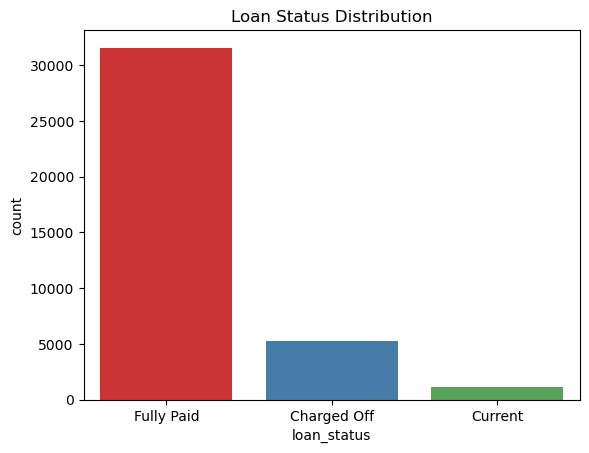

In [37]:
# Univariate analysis for loan Status
sns.countplot(x='loan_status', data=loan1,palette='Set1',hue='loan_status')
plt.title('Loan Status Distribution')
plt.show()

**Analysis for loan status**

The graphs show that most borrowers have successfully repaid their debts, but a few have defaulted, giving us an understanding of the bank's potential losses. Since the number of charged-off loans is relatively low, we can infer that the bank faces minimal risk. 


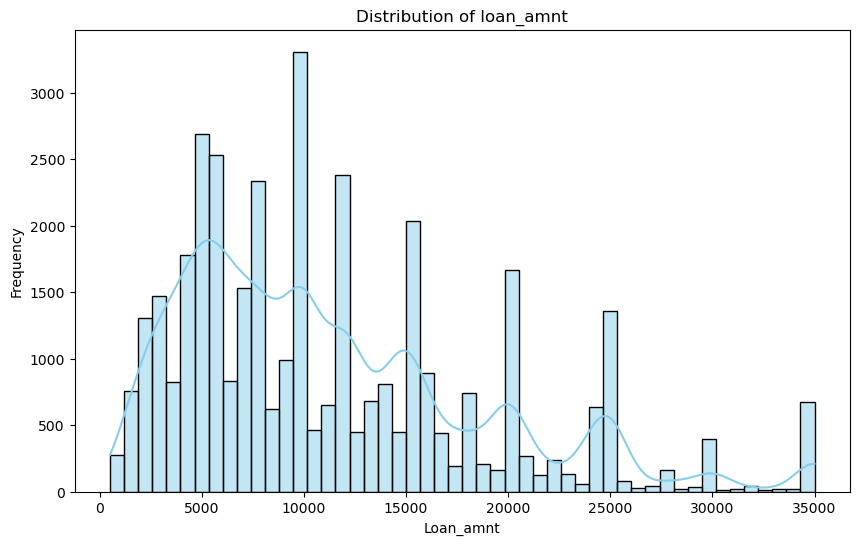

In [39]:
# Define a function for plotting the numerical values
def plot_num(column,binValue):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=loan1, x=column, kde=True, bins=binValue, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.show()
    
# Plot the distribution of loan amounts
plot_num('loan_amnt',50)
# the histogram is right-skewed, it suggests that there are more small loans than large ones.


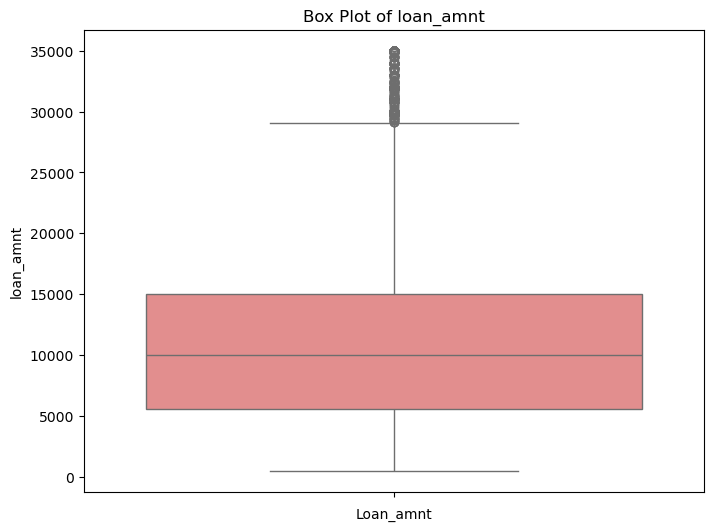

In [40]:
# Check for outliers for loan_amnt using a box plot
def outlier_num(column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=loan1[column], color='lightcoral')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column.capitalize())
    plt.show()
    
outlier_num('loan_amnt')

In [41]:
loan1['loan_amnt'].describe()

count    37878.000000
mean     11320.884154
std       7477.402079
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

**Analysis for Loan Amount:** 

- the histogram is right-skewed, it suggests that there are more small loans than large ones.
- From both the box plot, and the describe method We can see there are loan amounts that are much higher than the majority, which may pose a higher risk of default due to large repayment.

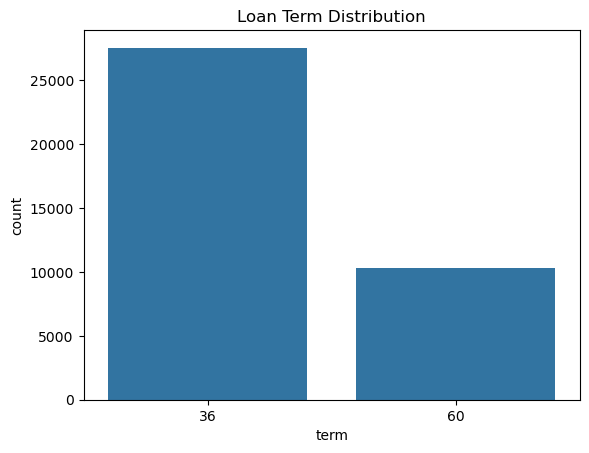

In [43]:
# Plot the distribution of terms
sns.countplot(x='term', data=loan1)
plt.title('Loan Term Distribution')
plt.show()

**Analysis for Loan Term:** 
    
The graph illustrates that a larger number of borrowers are choosing loans with shorter terms compared to those opting for longer-term loans. 

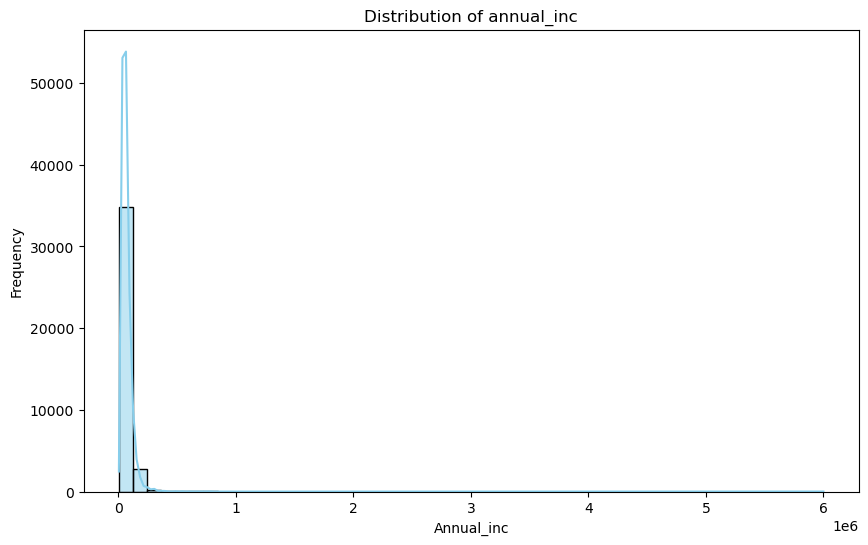

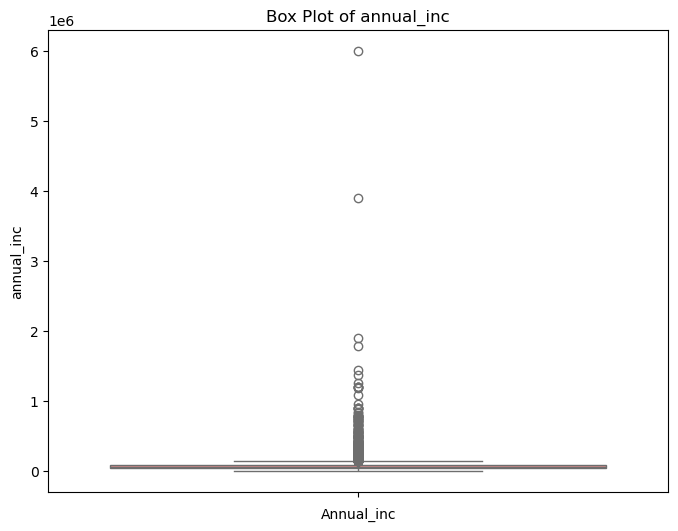

count    3.787800e+04
mean     6.964569e+04
std      6.365170e+04
min      4.000000e+03
25%      4.171890e+04
50%      6.000000e+04
75%      8.350000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [45]:
# Plot the distribution of Annual Income

plot_num('annual_inc',50)
outlier_num('annual_inc')
loan1['annual_inc'].describe()

**Insights for Annual Income :**
- the minimum value is 4000 and max value is 6 million , seems to be extreme outliers, Need to check whether it is a mistake or valid data values
- The distribution of annual income is right skewed (postive-skewed),there are smaller number of high salary individuals


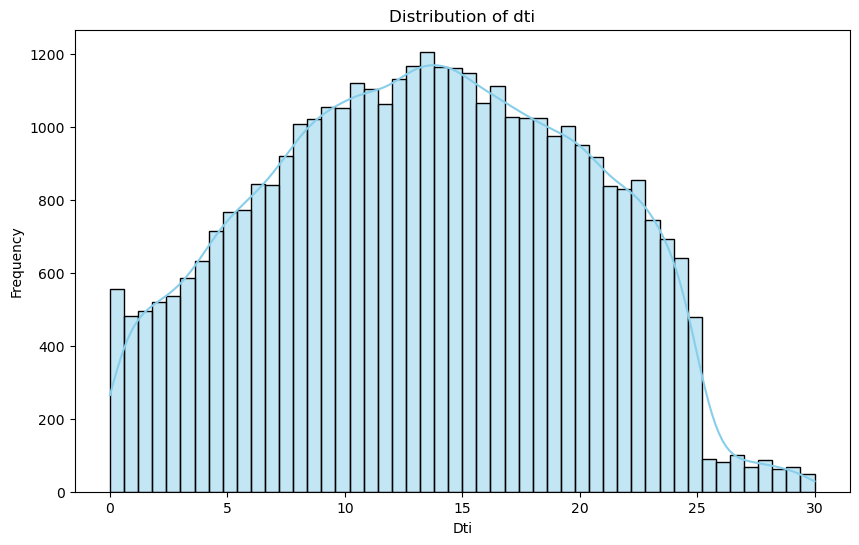

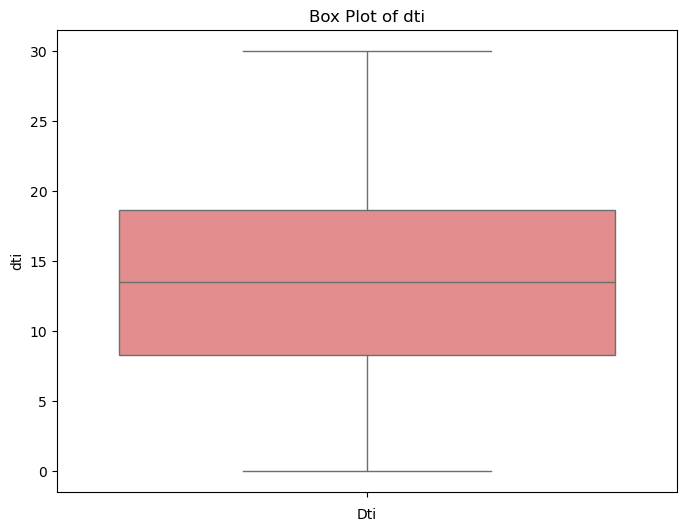

count    37878.000000
mean        13.373478
std          6.657144
min          0.000000
25%          8.270000
50%         13.470000
75%         18.630000
max         29.990000
Name: dti, dtype: float64

In [47]:
# Check for outliers for dti -debt to income ratio 
plot_num('dti',50)
outlier_num('dti')
loan1['dti'].describe()

**Insights for Debt to income Ratio :**

-The distribution of Debt to income Ratio is Normally Distributed Histogram. Bell Curved.
-Most values are concentrated around the mean (center).
- Borrowers with higher dti ratios (approaching the maximum value) may have a higher risk of default. 
- Lower dti ratios are less likely to default

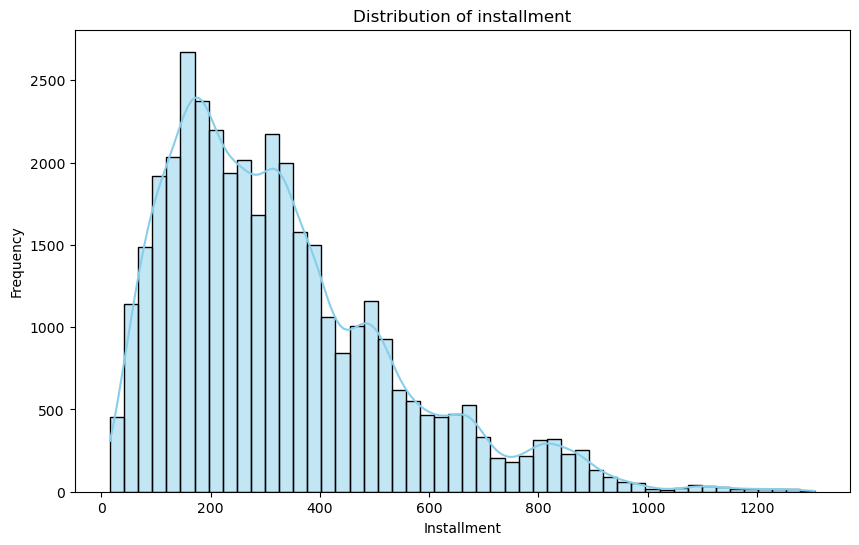

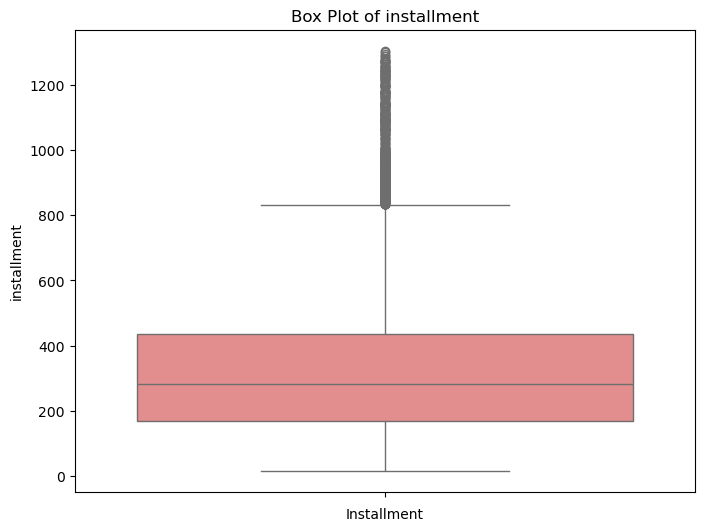

count    37878.000000
mean       326.951209
std        209.081429
min         16.080000
25%        168.670000
50%        282.990000
75%        434.577500
max       1305.190000
Name: installment, dtype: float64

In [49]:
# Plot and Check for outliers for installment
plot_num('installment',50)
outlier_num('installment')
loan1['installment'].describe()

**Insights for Installment :**

- the minimum value is 326.95 and max value is 1305.19
- The distribution of funded amount is right skewed (postive-skewed), few loans with high installments
- Majority of applicants between 25% -75% range. 

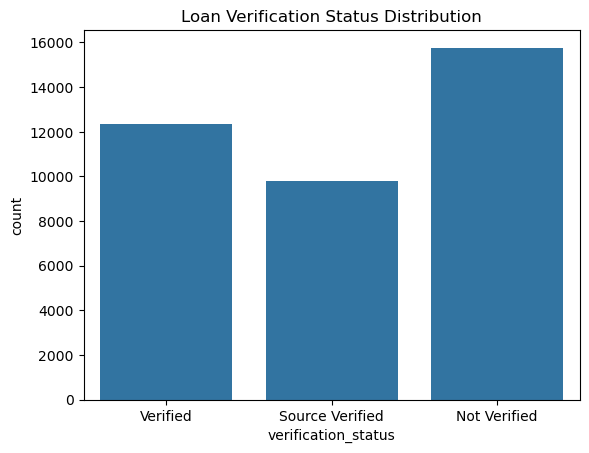

In [51]:
# Plot and Check for verification_status
sns.countplot(x='verification_status', data=loan1)
plt.title('Loan Verification Status Distribution')
plt.show()

**Insights for Loan Verification Status :**

- The graph reveals that a significant portion of borrowers have not had their income verified, which raises concerns for the bank regarding potential risks.

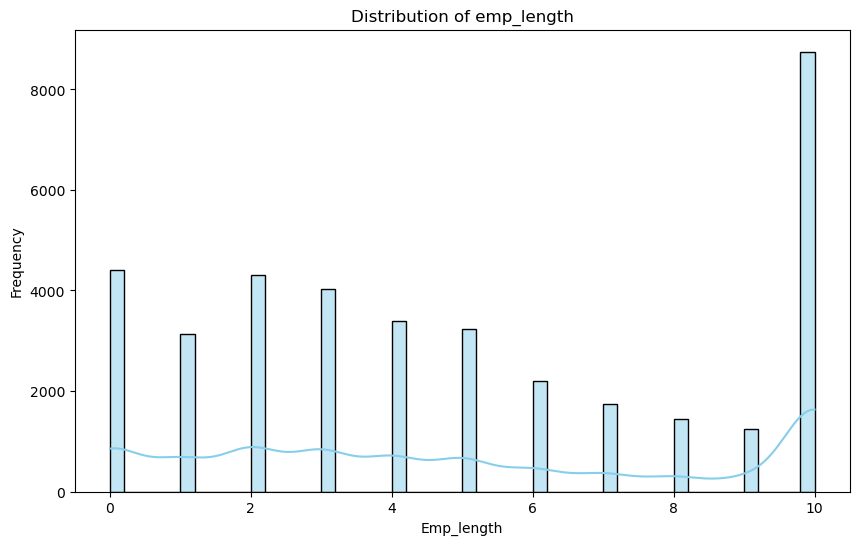

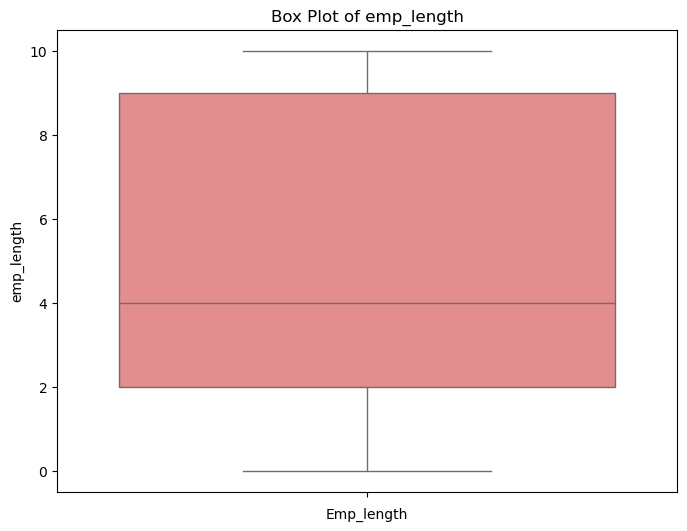

count    37878.000000
mean         4.995697
std          3.557642
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [53]:
# Plot and Check for Employment Length
plot_num('emp_length',50)
outlier_num('emp_length')
loan1['emp_length'].describe()

**Insights for Employee Length :**
- Shorter employment lengths less than 1 year have high risk
- Longer employment length means stable and can be concidered as low risk

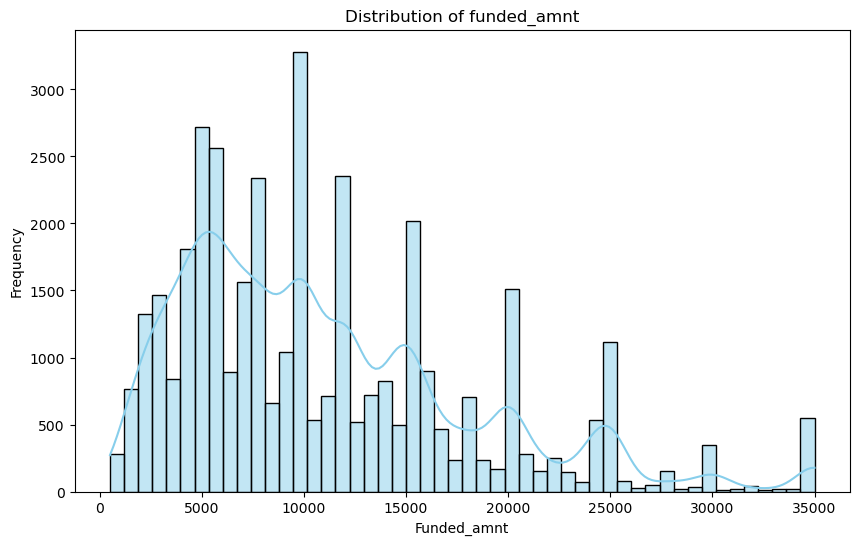

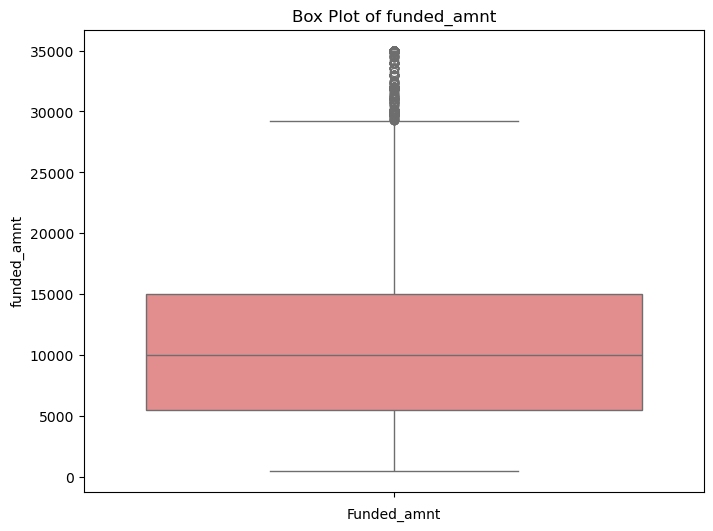

count    37878.000000
mean     11043.160938
std       7205.060763
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [55]:
# Plot and Check for Funded Amount
plot_num('funded_amnt',50)
outlier_num('funded_amnt')
loan1['funded_amnt'].describe()

# Moving to Bivariate analysis....

**Insights for Funded Amount :**

- the minimum value is 500 and max value is 35000 , seems to be extreme outliers, Need to check whether it is a mistake
or valid data values.But compared to annual income this is reasonable
- The distribution of funded amount is right skewed (postive-skewed)
- Majority of applicants between 10,000 and 15,000 range

In [57]:
# Identifying outliers in numerical columns using the IQR method
numerical_columns = ['annual_inc', 'loan_amnt', 'funded_amnt', 'installment']
outliers_info = {}

for col in numerical_columns:
    Q1 = loan1[col].quantile(0.25)
    Q3 = loan1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = loan1[(loan1[col] < lower_bound) | (loan1[col] > upper_bound)]
    outliers_info[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": len(outliers)
    }

outliers_info

{'annual_inc': {'Lower Bound': -20952.749999999993,
  'Upper Bound': 146171.65,
  'Outliers Count': 1776},
 'loan_amnt': {'Lower Bound': -8500.0,
  'Upper Bound': 29100.0,
  'Outliers Count': 1211},
 'funded_amnt': {'Lower Bound': -8750.0,
  'Upper Bound': 29250.0,
  'Outliers Count': 1024},
 'installment': {'Lower Bound': -230.19125000000005,
  'Upper Bound': 833.43875,
  'Outliers Count': 1137}}

In [58]:
# Cap extreme values in the 'annual_inc' column at the upper bound
annual_inc_upper_bound = 144500.0
loan1['annual_inc'] = np.where(loan1['annual_inc'] > outliers_info['annual_inc']['Upper Bound'], outliers_info['annual_inc']['Upper Bound'], loan1['annual_inc'])

# Cap extreme values in the 'loan_amnt' column at the upper bound
loan_amt_upper_bound = 29100.0
loan1['loan_amnt'] = np.where(loan1['loan_amnt'] > outliers_info['loan_amnt']['Upper Bound'], outliers_info['loan_amnt']['Upper Bound'], loan1['loan_amnt'])

# Cap extreme values in the 'funded_amnt' column at the upper bound
funded_amnt_upper_bound = 29250.0
loan1['funded_amnt'] = np.where(loan1['funded_amnt'] > outliers_info['funded_amnt']['Upper Bound'], outliers_info['funded_amnt']['Upper Bound'], loan1['funded_amnt'])

# Cap extreme values in the 'installment' column at the upper bound
installment_upper_bound = 826.135
loan1['installment'] = np.where(loan1['installment'] > outliers_info['installment']['Upper Bound'], outliers_info['installment']['Upper Bound'], loan1['installment'])

# Confirm changes to the 'annual_inc' column
loan1['annual_inc'].describe()
# Confirm changes to the 'loan_amnt' column
loan1['loan_amnt'].describe()
# Confirm changes to the 'funded_amnt' column
loan1['funded_amnt'].describe()
# Confirm changes to the 'installment' column
loan1['installment'].describe()

count    37878.000000
mean       323.758653
std        199.381162
min         16.080000
25%        168.670000
50%        282.990000
75%        434.577500
max        833.438750
Name: installment, dtype: float64

In [59]:
loan1.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [60]:
# Creating the binary 'is_default' column which will be our target variable
loan1['is_default'] = loan1['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

# Verify the new column
print(loan1[['loan_status', 'is_default']].head())
loan1['is_default'].describe()

counts = loan1['is_default'].value_counts() 

# Calculate the percentages 
percentages = counts / counts.sum() * 100
percentages

   loan_status  is_default
0   Fully Paid           0
1  Charged Off           1
2   Fully Paid           0
3   Fully Paid           0
4      Current           0


is_default
0    86.234754
1    13.765246
Name: count, dtype: float64

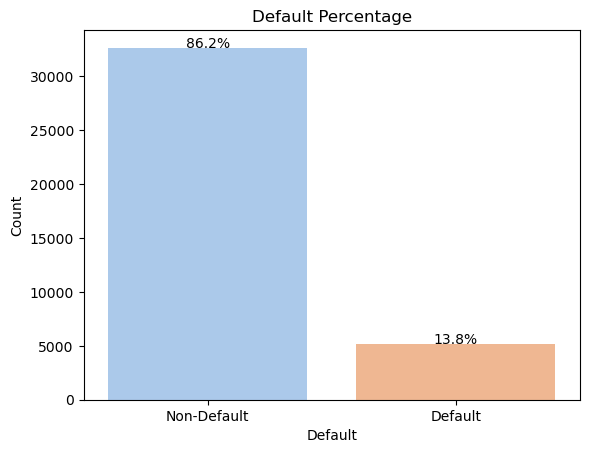

In [61]:
# Map the numeric values to labels 
loan1['isDefault_Label'] = loan1['is_default'].map({0: 'Non-Default', 1: 'Default'}) 

# Calculate the percentages 
total = len(loan1) 
ax = sns.countplot(x='isDefault_Label', data=loan1, hue='isDefault_Label', palette="pastel") 

# Annotate the bars with percentages 
for p in ax.patches: 
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 3,
        f'{height / total * 100:.1f}%',
        ha="center"
    ) 
# Show the plot
plt.title('Default Percentage')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

**Overall default rate is near to 13.8%**

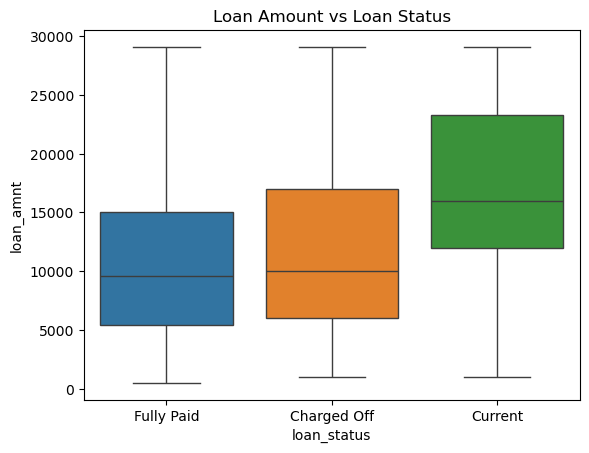

In [63]:
# Bivariate analysis
# Loan Amount vs Loan Status
sns.boxplot(x='loan_status',  y="loan_amnt",hue='loan_status', data=loan1)
plt.title('Loan Amount vs Loan Status')
plt.show()


**Analysis for Loan Status vs Loan Amount**
  
- Higher loan amount is taken by people in the current status
- The range of loan amount for the defaulters is highest with some outliers taking high loan amount
-Maximum outliers are present for fully paid status


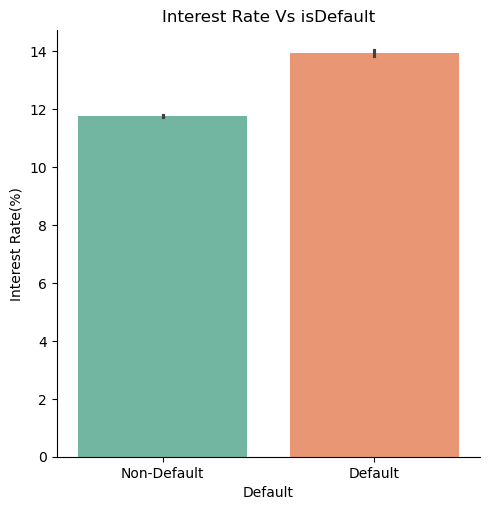

In [65]:
# Bivariate analysis
# Interest Rate Vs isDefault
sns.catplot(x="isDefault_Label", y="int_rate",kind="bar",data=loan1,palette='Set2',hue='isDefault_Label')
plt.title('Interest Rate Vs isDefault')
plt.xlabel('Default')
plt.ylabel('Interest Rate(%)')
plt.show()

**Interest Rate and Risk:**
- The plot shows high interest rates vs Default. It means higher interest rates are associated with a greater likelihood of default.
-interest rates can be a strong driver variable for predicting defaults.
                                               
Insights:
-This suggests lenders might need stricter approval criteria for high-interest-rate loans.                                        
                                               

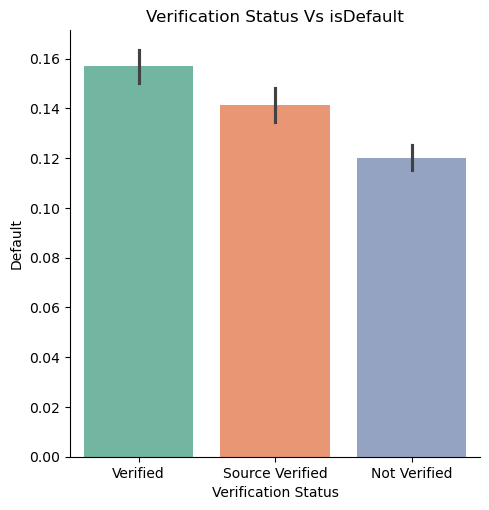

In [67]:
sns.catplot(x="verification_status", y="is_default",kind="bar",data=loan1,palette='Set2',hue='verification_status')
plt.title('Verification Status Vs isDefault')
plt.xlabel('Verification Status')
plt.ylabel('Default')
plt.show()

**Verification Status vs isDefault**
- Here, verified status has higher rate of default than not verified ones.

In [69]:
# Checking with group by verification status
grouped1 = loan1.groupby('verification_status').mean(numeric_only=True)
print(grouped1)

                        loan_amnt   funded_amnt  funded_amnt_inv       term  \
verification_status                                                           
Not Verified          8416.900805   8288.238092      7858.955015  39.560348   
Source Verified      10053.106781   9853.832975      9679.621163  43.275851   
Verified             15651.086428  15200.545241     14864.818832  45.799254   

                      int_rate  installment  emp_length    annual_inc  \
verification_status                                                     
Not Verified         11.258025   257.742259    4.776749  58971.934131   
Source Verified      12.115790   288.770520    4.657871  63997.799157   
Verified             13.086347   435.884440    5.543376  76475.530477   

                           dti  delinq_2yrs  inq_last_6mths  open_acc  \
verification_status                                                     
Not Verified         13.138942     0.140293        0.852033  9.019788   
Source Verified    

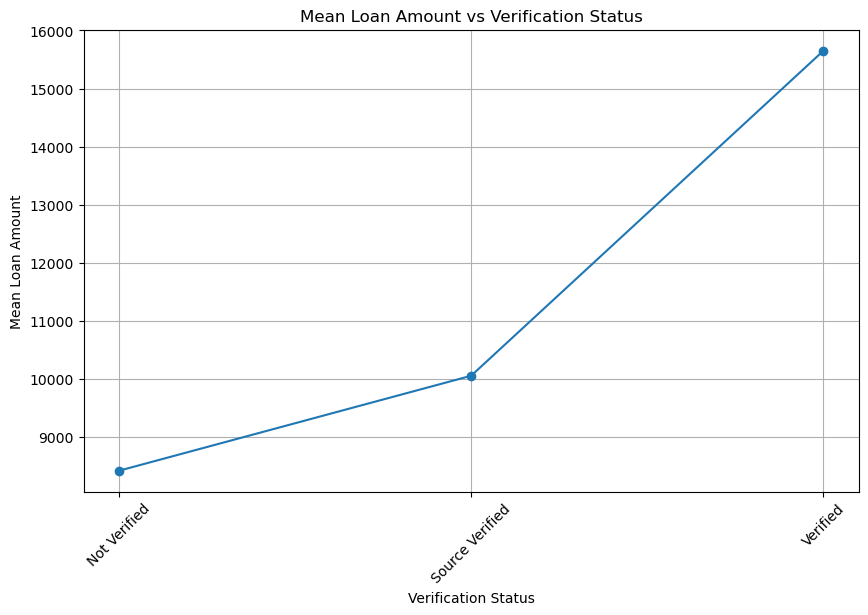

In [70]:
plt.figure(figsize=(10, 6))

# Plotting the loan amounts
plt.plot(grouped1.index, grouped1['loan_amnt'], label='Grouped Mean Loan Amount', marker='o')

# Customize the plot
plt.title('Mean Loan Amount vs Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Mean Loan Amount')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

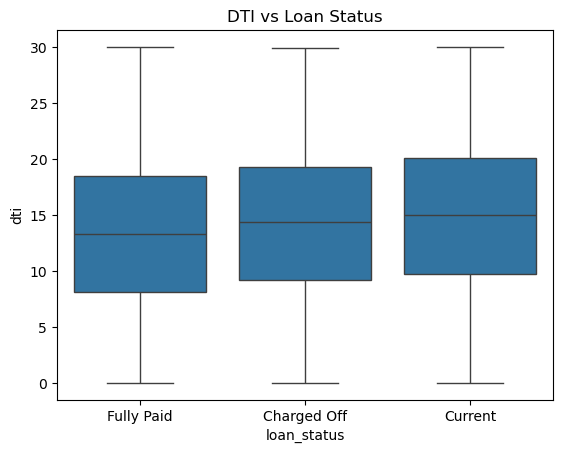

In [71]:
# Plotting the Debt to income ration vs Loan Status
sns.boxplot(x='loan_status', y='dti', data=loan1)
plt.title('DTI vs Loan Status')
plt.show()

**Analysis on Debt to income ratio vs Loan Status**

This box plot illustrates that the majority of Debt-to-Income (DTI) ratios are concentrated around the middle value range, regardless of the loan status. This suggests that a typical borrower tends to have a moderate DTI, irrespective of whether their loan is performing or has defaulted. The plot highlights the general trend of borrowers having balanced income-to-debt ratios, with outliers being less common.


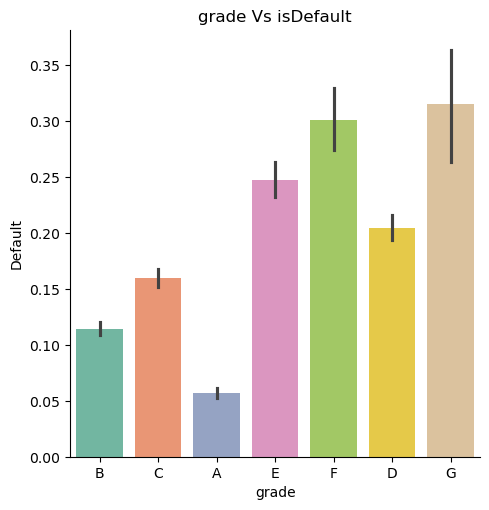

grade
A     5.719074
B    11.453245
C    15.956482
D    20.489055
E    24.754635
F    30.108588
G    31.511254
Name: is_default, dtype: float64

In [73]:
# Plotting the grade vs isDefault

sns.catplot(x="grade", y="is_default",kind="bar",data=loan1,palette='Set2',hue='grade')
plt.title('grade Vs isDefault')
plt.xlabel('grade')
plt.ylabel('Default')
plt.show()
loan1.groupby('grade')['is_default'].mean()*100

**Grades vs isDefault**

As Grades move from A to G, the default rate is increasing. 
- Grade G has the highest default rate & high risk, while Grade A is low risk
- Institutions can increase interest rates for Grade D-G borrowers to compensate for the higher risk.

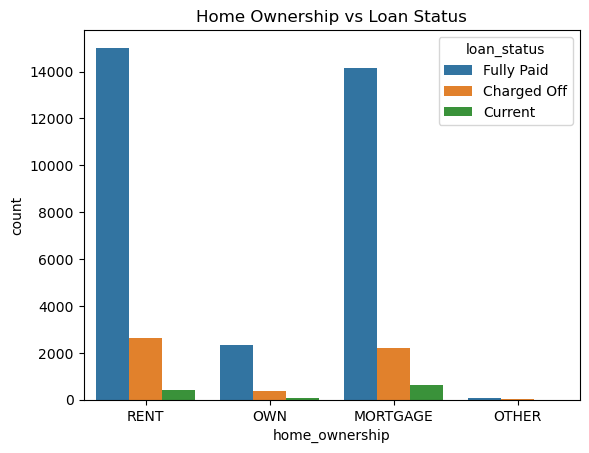

In [75]:
# Plotting the Home Ownership vs Loan Status

sns.countplot(x='home_ownership', hue='loan_status', data=loan1)
plt.title('Home Ownership vs Loan Status')
plt.show()

**Analysis of home ownership vs Loan Status**

-This graph reveals that, regardless of home ownership status, the majority of borrowers have successfully paid off their loans. 
-However, the data also shows that the lowest number of defaulters is among homeowners ("Own"), while renters ("Rent") account for the highest proportion of defaults. 
-Additionally, it is evident that the number of loans taken by homeowners is relatively small.

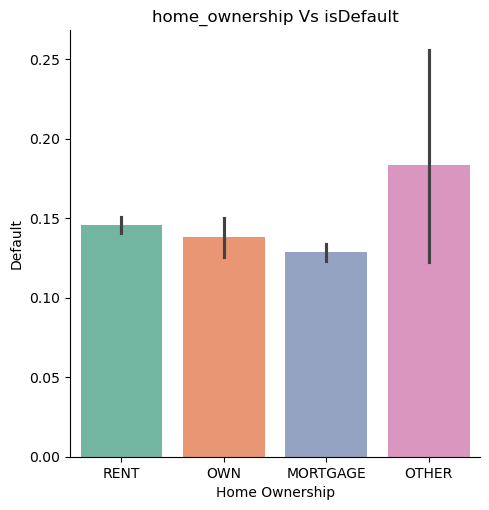

home_ownership
MORTGAGE    12.893898
OTHER       18.367347
OWN         13.832853
RENT        14.547569
Name: is_default, dtype: float64

In [77]:
# Plotting the Home Ownership vs isDefault

sns.catplot(x="home_ownership", y="is_default",kind="bar",data=loan1,palette='Set2',hue='home_ownership')
plt.title('home_ownership Vs isDefault')
plt.xlabel('Home Ownership')
plt.ylabel('Default')
plt.show()
loan1.groupby('home_ownership')['is_default'].mean()*100

**Home Ownership vs Default**
- Here clearly, it shows those who do not fall under (mortgage, rent and owners) are more tend to default.
- There is no major difference in all the categories here. The difference is less.

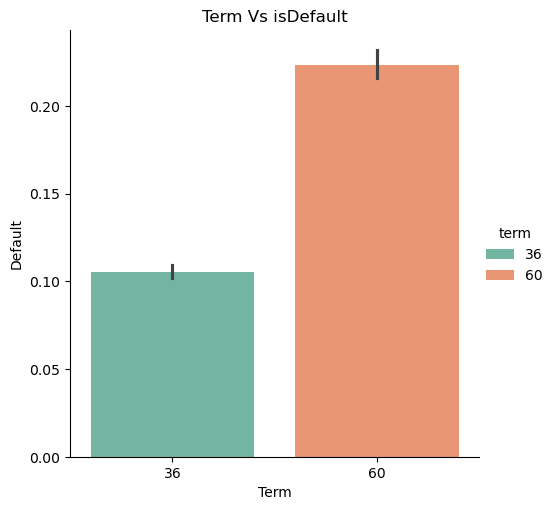

term
36    10.545045
60    22.342586
Name: is_default, dtype: float64

In [79]:
# Plotting the Term Vs isDefault

sns.catplot(x="term", y="is_default",kind="bar",data=loan1,palette='Set2',hue='term')
plt.title('Term Vs isDefault')
plt.xlabel('Term')
plt.ylabel('Default')
plt.show()
loan1.groupby('term')['is_default'].mean()*100

**Term vs Default**
- 36 months have lower default rate and 60 months terms have higher default rate
- This suggests lenders might need stricter approval criteria for 60 months loans.

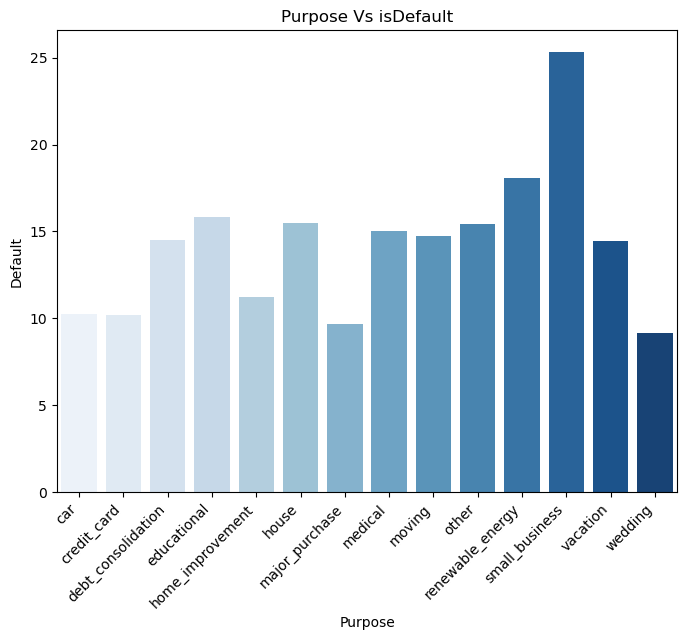

purpose
car                   10.270270
credit_card           10.204082
debt_consolidation    14.506500
educational           15.824916
home_improvement      11.244696
house                 15.512465
major_purchase         9.660450
medical               15.045593
moving                14.727273
other                 15.407368
renewable_energy      18.085106
small_business        25.319396
vacation              14.450867
wedding                9.130913
Name: is_default, dtype: float64

In [81]:
# Plotting the Purpose Vs isDefault

# Group by 'Purpose' and calculate the default rate for each category
default_rate_by_purpose = loan1.groupby('purpose')['is_default'].mean() * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=default_rate_by_purpose.index, y=default_rate_by_purpose.values, palette='Blues', hue=default_rate_by_purpose.index)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Purpose Vs isDefault')
plt.xlabel('Purpose')
plt.ylabel('Default')
plt.show()

loan1.groupby('purpose')['is_default'].mean()*100

**Purpose Vs Default:**

- Categories like small business tend to default more and is high risk
- This suggests lenders might need stricter approval criteria for small business.

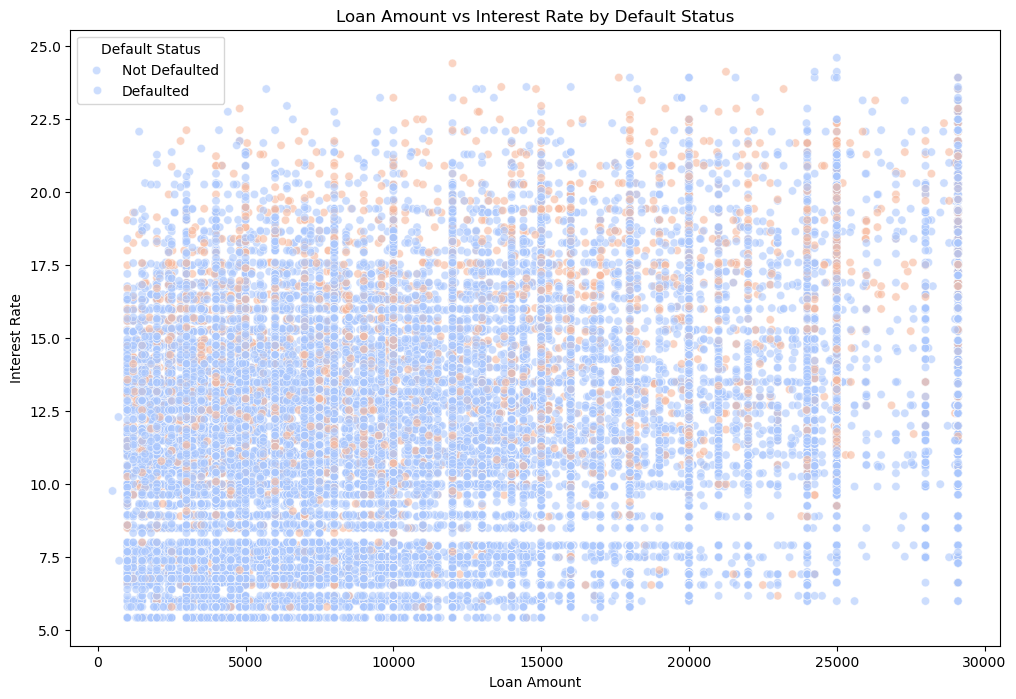

In [83]:
# Multivariate Analysis
# 1. isDefault by loan amount and int rate

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='loan_amnt',
    y='int_rate',
    hue='is_default',
    data=loan1,
    palette='coolwarm',
    alpha=0.6
)
plt.title('Loan Amount vs Interest Rate by Default Status')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.legend(title='Default Status', labels=['Not Defaulted', 'Defaulted'])
plt.show()

**Loan Amount vs Interest Rate by Default Status**
- Higher interest rate tend to default more from the grapgh
- Combination of high loan amount and high interest rate increase the default rate
- Too much clustered blue dots around the lower/moderate interest rates and lower loan amount, 
    This shows they are more tend to pay on time and considered low risk
- There are some extreme outlier which are defaulted, they are very high risk. They have to be checked more 

<Figure size 1000x600 with 0 Axes>

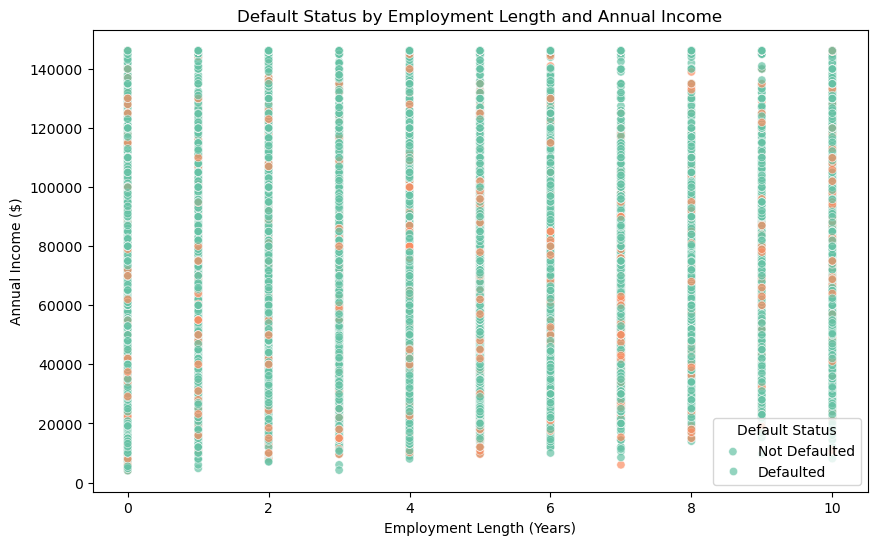

In [85]:
# 2. isDefault by emp_length and annual_income
plt.figure(figsize=(10, 6))

# Scatter plot of Annual Income vs. Employment Length, colored by Default Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan1, x='emp_length', y='annual_inc', hue='is_default', palette='Set2', alpha=0.7)
plt.title('Default Status by Employment Length and Annual Income')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Annual Income ($)')
plt.legend(title='Default Status', labels=['Not Defaulted', 'Defaulted'])
plt.show()

In [86]:
# Proceeding to Correlation Analysis...

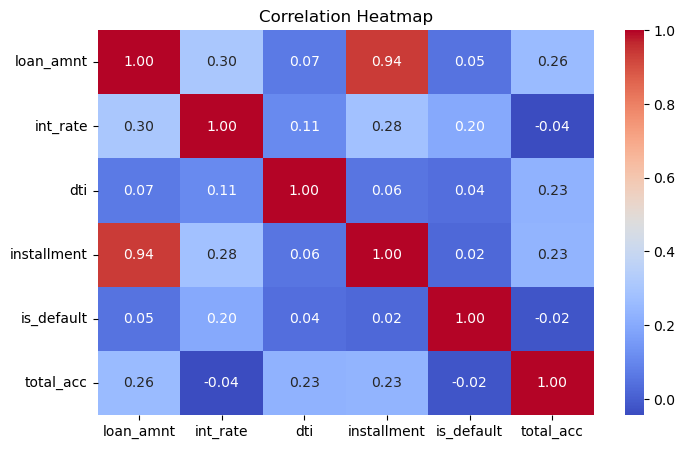

In [87]:
# Correlation Analysis
# Heatmap for numeric variables
plt.figure(figsize=(8, 5))
corr_matrix = loan1[['loan_amnt', 'int_rate', 'dti', 'installment','is_default','total_acc']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**Insights on Heatmap:**
1) Loan Amount (loan_amnt) and Interest Rate (int_rate): 
    Positive correlation. Large amount can be associated to high interest rate.
        Possible chance to default
2) Loan Amount (loan_amnt) and Monthly Installment (installment):
    Strong Positive correlation as 0.94 is the value. When loan amount increase, installment alos increases.
        Higher chance to default
The rest of the correlations are moderate.

In [163]:
!pip show Seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Users\DELL\anaconda3\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
